# -Escolha uma base de dados de classificação (ex.: wine, breast cancer, iris). O Scikit-learn e o UCI Repository possuem algumas bases.


In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


# - Plote os dados da base de dados escolhida em 2D.


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

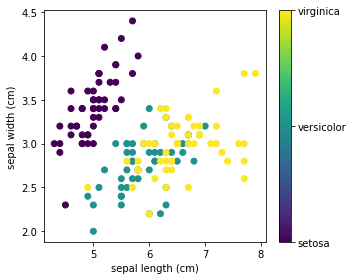

In [6]:
from sklearn.datasets import load_iris
iris2 = load_iris()

x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris2.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris2.data[:, x_index], iris2.data[:, y_index], c=iris2.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris2.feature_names[x_index])
plt.ylabel(iris2.feature_names[y_index])

plt.tight_layout()
plt.show()

# 3) Realize o cálculo de média, mediana, máximo, mínimo, desvio padrão para cada atributo númerico da base de dados.

In [7]:
media = iris['SepalLengthCm'].mean() # média
mediana = iris['SepalLengthCm'].median() # mediana
desvio_padrao = iris['SepalLengthCm'].std() # Desvio padrão
min = iris['SepalLengthCm'].min()
max = iris['SepalLengthCm'].max()

iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# 4) Verifique a presença de outliers (e.g., valor maior que 3 vezes o desvio padrão da base) da base de dados escolhida. Caso não exista, insira uma ou mais linhas para a criação de outliers, e verifique, novamente, a presença de outliers.



In [8]:
outliers_1 = []

def find_outliers(iris):
    corte_iris = 3
    media_Width = iris['SepalWidthCm'].mean() # média
    desvio_padrao_Width = iris['SepalWidthCm'].std() # Desvio padrão

    for dado in iris["SepalWidthCm"]:
        
        z_score = (dado - media_Width) / desvio_padrao_Width
        if np.abs(z_score) > corte_iris:
            outliers_1.append(dado)
    
    return outliers_1

outliers_1 = find_outliers(iris)
outliers_1

[4.4]

<AxesSubplot:>

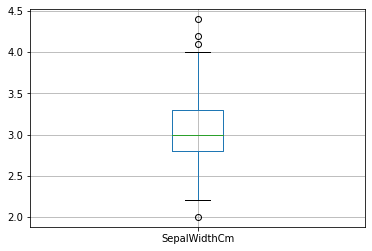

In [9]:
#comando utilizado para gerar o boxplot
#boxplot é empregado para ver se existem outlier
# Box Plot
import seaborn as sns
iris.boxplot(column='SepalWidthCm')
#sns.boxplot(iris['SepalWidthCm'])


# 5) Remova os outliers e realize o cálculo de média, mediana, moda, desvio padrão para cada atributo numérico da base de dados

In [10]:
outliers = iris.loc[iris['SepalWidthCm']>= 4.4]
iristeste = iris
iristeste = iristeste.drop(15)
 
iristeste.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,75.899329,5.844295,3.044966,3.773826,1.204027
std,43.314804,0.830775,0.420655,1.760543,0.762896
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,39.000000,5.100000,2.800000,1.600000,0.300000
50%,76.000000,5.800000,3.000000,4.400000,1.300000
75%,113.000000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.200000,6.900000,2.500000


# - Crie 5 vetores de atributos distintos, e utilizando as distâncias euclidiana e Manhattan, determine a qual classe cada vetor de atributos pertence.

In [11]:
from sklearn.datasets import make_regression

In [12]:
df, target = make_regression(n_samples=150, n_features=4, noise = 8)
iris = iris.drop(['Id', 'Species'], axis = 1)


In [13]:
colun = ['vecto0', 'vecto1', 'vecto2', 'vecto3']
DataFrame = pd.DataFrame(df, columns = colun)

In [14]:
def euclidian_distance(df1, df2): 
    return np.sqrt(np.sum(np.square(df1-df2)))

In [15]:
def manthatam_distance(df1,df2): 
    return np.sum(np.abs(df1-df2))

In [16]:
# analisa a menor distancia e retorna o seu valor
def decide_class(calc_dist):
    min_dist = float(np.min(calc_dist))
    return calc_dist.index(min_dist)

In [38]:
manthatam_classes = []
euclidian_classes = []
mantha = []
euclid = []
colum_name = []

for colum_make in DataFrame:
    c_make  = DataFrame[colum_make]
    
    mantha.clear()
    euclid.clear()
    colum_name.clear()
    
    for colum_iris in iris: 
        c_iris = iris[colum_iris]
        
        manthatam = manthatam_distance(c_make.to_numpy(), c_iris.to_numpy())
        euclidian = euclidian_distance(c_make.to_numpy(), c_iris.to_numpy())
        
        colum_name.append(str(c_iris.name))
        
        mantha.append(manthatam)
        euclid.append(euclidian)
    
    def_class = decide_class(mantha)
    manthatam_classes.append([colum_make, colum_name[def_class]])
    def_class = decide_class(euclid)
    euclidian_classes.append([colum_make, colum_name[def_class]])

In [33]:
colum_name[def_class]

'0      0.2\n1      0.2\n2      0.2\n3      0.2\n4      0.2\n      ... \n145    2.3\n146    1.9\n147    2.0\n148    2.3\n149    1.8\nName: PetalWidthCm, Length: 150, dtype: float64'

In [37]:
c_iris.name

'PetalWidthCm'

In [39]:
manthatam_classes

[['vecto0', 'PetalWidthCm'],
 ['vecto1', 'PetalWidthCm'],
 ['vecto2', 'PetalWidthCm'],
 ['vecto3', 'PetalWidthCm']]

In [40]:
euclidian_classes

[['vecto0', 'PetalWidthCm'],
 ['vecto1', 'PetalWidthCm'],
 ['vecto2', 'PetalWidthCm'],
 ['vecto3', 'PetalWidthCm']]

# - Carregue uma nova base de dados que possua atributos categóricos, faça um merge de dois dataframes (um para cada base de dados), e crie uma nova coluna para indicar a que dataframe/base de dados pertence cada linha.


In [20]:
titanic = pd.read_csv('Titanic.csv')
titanic_teste = titanic
concat_df =pd.concat([iris, titanic], axis = 1)
concat_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Name,PClass,Age,Sex,Survived
0,5.1,3.5,1.4,0.2,"Allen, Miss Elisabeth Walton",1st,29.00,female,1
1,4.9,3.0,1.4,0.2,"Allison, Miss Helen Loraine",1st,2.00,female,0
2,4.7,3.2,1.3,0.2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0
3,4.6,3.1,1.5,0.2,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0
4,5.0,3.6,1.4,0.2,"Allison, Master Hudson Trevor",1st,0.92,male,1


# - Caso a nova base de dados seja ‘titanic’: selecione e mostre a quantidade de passageiros do titanic que possuem mais de 27 anos e que sobreviveram ao acidente. 
# Caso seja outra base de dados: escolha uma condição de filtragem.


In [21]:
questao8 = titanic.loc[ (titanic['Age'] >= 27.0) & (titanic['Survived'] == 1) ]
questao8

,Name,PClass,Age,Sex,Survived
0,"Allen, Miss Elisabeth Walton",1st,29.0,female,1
5,"Anderson, Mr Harry",1st,47.0,male,1
6,"Andrews, Miss Kornelia Theodosia",1st,63.0,female,1
8,"Appleton, Mrs Edward Dale (Charlotte Lamson)",1st,58.0,female,1
15,"Baxter, Mrs James (Helene DeLaudeniere Chaput)",1st,50.0,female,1
...,...,...,...,...,...
903,"Jonsson, Mr Carl",3rd,32.0,male,1
906,"Jussila, Mr Erik",3rd,32.0,male,1
931,"Kink, Mr Anton",3rd,39.0,male,1
1264,"Turkula, Mrs Hedvig",3rd,63.0,female,1


# - Caso a nova base de dados seja ‘titanic’: transforme os dados contínuos de idade do titanic em dados categóricos de acordo com uma regra. Sugestão de regra: 
# a) 0 a 18 anos: criança
# b) 18 a 60 anos: adulto
# c) maior que 60: idoso
# Caso seja outra base de dados: crie sua regra de transformação de dados.


In [22]:
#titanic_teste['Age'] = titanic_teste['Age'].astype(int)
#titanic_teste['Age'] = pd.to_numeric(titanic_teste['Age'])

In [23]:
titanic_teste['Age group'] = titanic_teste['Age'].mask(titanic_teste['Age'] <= 18.0, 'criança')

In [24]:
titanic_teste['Age group'] = titanic_teste['Age group'].mask((titanic_teste['Age'] > 18.0) & (titanic_teste['Age'] < 60.0), 'adulto')

In [25]:
titanic_teste['Age group'] = titanic_teste['Age group'].mask(titanic_teste['Age'] > 60.0, 'idoso')

In [26]:
titanic_teste

,Name,PClass,Age,Sex,Survived,Age group
0,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,adulto
1,"Allison, Miss Helen Loraine",1st,2.00,female,0,criança
2,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,adulto
3,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,adulto
4,"Allison, Master Hudson Trevor",1st,0.92,male,1,criança
...,...,...,...,...,...,...
1308,"Zakarian, Mr Artun",3rd,27.00,male,0,adulto
1309,"Zakarian, Mr Maprieder",3rd,26.00,male,0,adulto
1310,"Zenni, Mr Philip",3rd,22.00,male,0,adulto
1311,"Lievens, Mr Rene",3rd,24.00,male,0,adulto
